# Phân tích - Khám phá dữ liệu (Exploratory Data Analysis)

<center>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR5upo-Gpw_Gd1Jh-IdlmL0F7YLKiDFVpjURg&usqp=CAU">
</center>

Một trong những bước cần thiết trước khi chúng ta bước vào quá trình xây dựng mô hình học máy dự đoán giá xe máy đó là phân tích - khám phá dữ liệu của chúng ta, đưa ra được những thông tin hữu ích cơ bản từ tập giá trị này. Đồng thời, có thể kết hợp thêm việc làm sạch dữ liệu nếu thấy cần thiết.

Việc có cái nhìn sơ bộ, đánh giá tổng quan ban đầu về mô hình là hết sức cần thiết và quan trọng, từ đó, giúp chúng ta định hướng ban đầu về các nhân tố tác động đến giá cả từ tập thuộc tính của dữ liệu, giúp đưa ra quyết định xây dựng mô hình một cách tốt hơn.

## 0. Khai báo thư viện, bộ dữ liệu

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Các biến đường dẫn được thay đổi tùy thuộc vào local
PATH = r"/home/duyanh/Documents/VS_WorkSpace/projects/programming_for_DS_v1/data/moto_cleaned.csv"

SAVE_PATH = r'/home/duyanh/Documents/VS_WorkSpace/projects/programming_for_DS_v1/data/moto_cleaned_EDA.csv'

In [80]:
df = pd.read_csv(PATH)
df.head(10)

,Hang_xe,Tuoi_xe,Nam_dang_ky,Tinh_trang_xe,Dung_tich_xe,Dong_xe,So_km_da_di,Loai_xe,Gia_xe
0,Suzuki,27,1996,Đã sử dụng,Không rõ,Sport/Xipo,1234,Tay côn,25500000.0
1,Piaggio,9,2014,Đã sử dụng,100 - 175 cc,Vespa,11000,Tay ga,32500000.0
2,Yamaha,10,2013,Đã sử dụng,100 - 175 cc,Exciter,25,Tay côn,27500000.0
3,Yamaha,8,2015,Đã sử dụng,100 - 175 cc,Exciter,37,Xe số,26500000.0
4,Honda,24,1999,Đã sử dụng,100 - 175 cc,Dream,25,Xe số,25000000.0
5,Honda,4,2019,Đã sử dụng,100 - 175 cc,Cub,585869,Xe số,3300000.0
6,Yamaha,10,2013,Đã sử dụng,Không rõ,Sirius,30,Xe số,7800000.0
7,Honda,4,2019,Đã sử dụng,Không rõ,Winner,1000,Tay côn,16500000.0
8,Honda,3,2020,Đã sử dụng,100 - 175 cc,Vario,1,Tay ga,40500000.0
9,Yamaha,5,2018,Đã sử dụng,Không rõ,Nvx,46000,Tay ga,26000000.0


Số chiều của tập dữ liệu

In [81]:
df.shape

(12216, 9)

Tập các thuộc tính của bộ dữ liệu

In [82]:
df.columns

Index(['Hang_xe', 'Tuoi_xe', 'Nam_dang_ky', 'Tinh_trang_xe', 'Dung_tich_xe',
       'Dong_xe', 'So_km_da_di', 'Loai_xe', 'Gia_xe'],
      dtype='object')

## 1. Phân tích dữ liệu định lượng

Dữ liệu định lượng là dữ liệu có trường giá trị là các số thực, thường mang tính liên tục. Các trường dữ liệu định lượng này có thể được đánh giá thông qua các tham số thống kê như giá trị trung bình, giá trị trung vị, tứ phân vị,...


Các trường dữ liệu định lượng có thể thấy trong tập dữ liệu này bao gồm
<ul>
  <li>Tuoi_xe</li>
  <li>So_km_da_di</li>
  <li>Gia_xe</li>
</ul>

Ta xem các tham số thống kê thông qua phương thức *describe()*

In [83]:
df[["Tuoi_xe", "So_km_da_di", "Gia_xe"]].describe()

,Tuoi_xe,So_km_da_di,Gia_xe
count,12216.000000,12216.000000,1.221600e+04
mean,9.031189,30542.483219,3.787350e+07
std,6.548294,85909.979118,1.076080e+08
min,1.000000,0.000000,1.000000e+06
25%,4.000000,3000.000000,1.150000e+07
50%,8.000000,12000.000000,2.280000e+07
75%,13.000000,25000.000000,3.950000e+07
max,43.000000,1000000.000000,8.888888e+09


NOTE - 1:

<ul>
  <li>
    Có thể thấy có độ lệch "kha khá" về tham số giá trị trung bình trong trường thuộc tính "so_km_da_di" so với điểm trung vị, có thể điều này do sự xuất hiện của các điểm đột biến của thuộc tính so_km_da_di trong bộ dữ liệu, điều tương tự cũng xuất hiện với "Gia_xe" (Cần phải lưu ý các điểm này) 
  </li>
  <li>
    Tuy nhiên việc "so_km_da_di" bị tác động nhiều hơn có thể thấy rõ hoàn toàn do tham số về độ lệch chuẩn (std) cũng "lớn một cách bất thường".
  </li>
</ul>

Do đó ta sẽ sử dụng biểu đồ hộp để quan sát các điểm đột biến trong bộ dữ liệu đối với cả 3 thuộc tính định tính

Biểu đồ hộp của cột "Tuoi_xe":


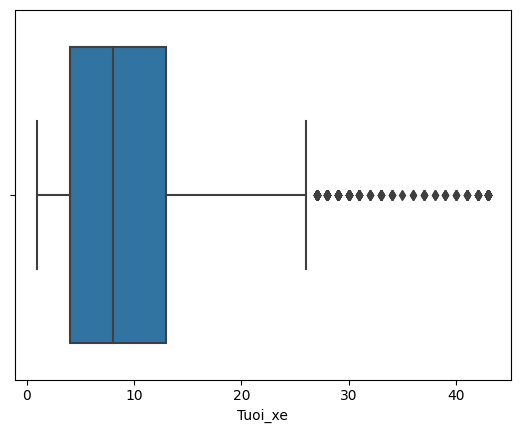

Biểu đồ hộp của cột "So_km_da_di":


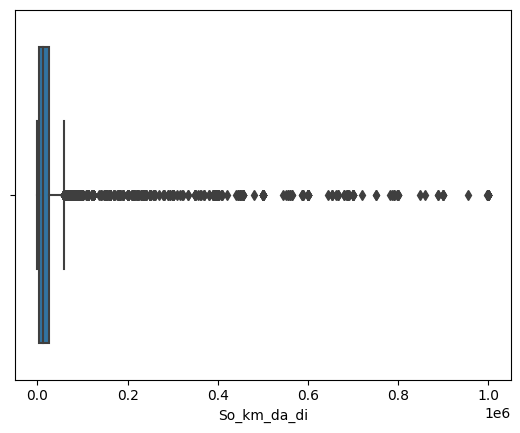

Biểu đồ hộp của cột "Gia_xe":


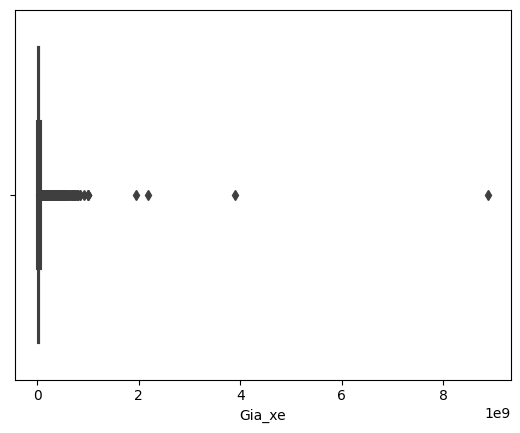

In [84]:
# Thể hiện biểu đồ hộp

cot_dinh_lg = ["Tuoi_xe", "So_km_da_di", "Gia_xe"]

for cot in cot_dinh_lg:
    print(f'Biểu đồ hộp của cột "{cot}":')
    sns.boxplot(x=df[cot])
    plt.show()

Đúng như chúng ta dự đoán, trong hai thuộc tính "Gia_xe" và "So_km_da_di", các điểm đột biến quá khác biệt khiến cho chiếc hộp dường như ợ trạng thái "bẹp lại"

Theo <a href='https://kenh14.vn/moi-nam-nguoi-viet-di-xe-may-trung-binh-7800-km-20200122195837562.chn'> Bài báo này </a>, số km trung bình xe máy đi một năm là 7800 km, tức để đi được 100000km cần mất khoảng gần 14 năm, chúng ta sẽ xem xét về số tuổi xe trong các quan sát quá bất thường về số km (Số km đã đi lớn hơn 100000km), để quyết định xem có nên loại bỏ chúng không

In [85]:
# pd.set_option('display.max_rows', None)

so_km_bat_thuong = df[df["So_km_da_di"] > 1e5]
so_km_bat_thuong[["Tuoi_xe", "So_km_da_di", "Gia_xe"]].describe()

,Tuoi_xe,So_km_da_di,Gia_xe
count,568.000000,568.000000,5.680000e+02
mean,12.737676,320911.073944,2.737356e+07
std,7.478825,251586.954030,4.368790e+07
min,1.000000,102070.000000,1.000000e+06
25%,8.000000,123456.000000,8.500000e+06
50%,12.000000,200000.000000,1.550000e+07
75%,16.000000,400000.000000,2.700000e+07
max,43.000000,1000000.000000,4.850000e+08


Có tới 75% xe dưới 16 năm, có nghĩa rằng để đi được con số 100000km có phần phi lý với những dữ liệu này, điều này xảy ra có thể do sự nhập "tự do" dữ liệu của người dùng khi đem bán

Đồng thời, các điểm bất thường cũng không tốt cho mô hình học máy, chúng có thể khiến các tham số của mô hình bị lệch đi đáng kể.

Còn đối với những chiếc xe có giá bất thường (Trên 200 triệu đồng), qua tìm hiểu trên <a href='https://xe.chotot.com/mua-ban-xe-may-thanh-pho-thu-duc-tp-ho-chi-minh/99109024.htm#px=SR-similarad-[PO-5][PL-bottom]'>Chợ tốt</a>, các thông tin này thường là các xe bán sỉ, không phải bán lẻ, do đó, đây là dữ liệu bị sai lệch về mặt thông tin.

Do vậy ta sẽ quyết định loại bỏ đi các điểm bất thường này.

In [86]:
# Loại bỏ những giá trị bất thường

# Giá xe

# Tạo ra các ngưỡng để loại bỏ các điểm bất thường
GIA_XE_MAX = 2e8
SO_KM_MAX = 0.7e5

df = df[df["Gia_xe"] < GIA_XE_MAX]
df = df[df["So_km_da_di"] < SO_KM_MAX]

df.shape



(11119, 9)

Ta thể hiện lại biểu đồ cột sau khi đã loại bỏ các điểm "siêu đột biến"

Biểu đồ hộp của cột "Tuoi_xe":


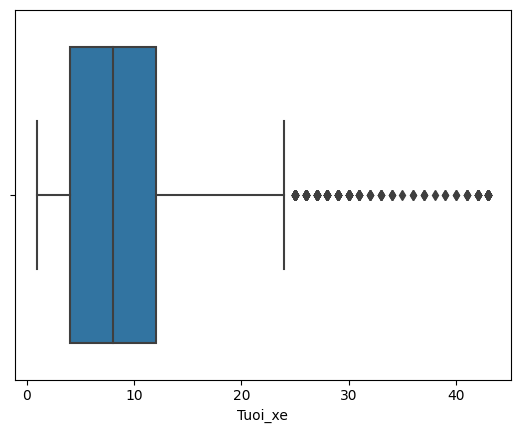

Biểu đồ hộp của cột "So_km_da_di":


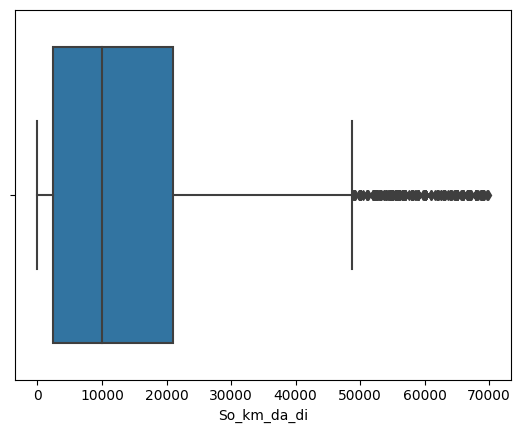

Biểu đồ hộp của cột "Gia_xe":


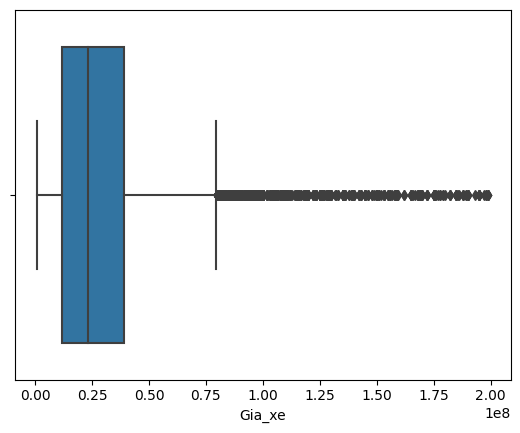

In [87]:
# Thể hiện biểu đồ hộp
for cot in cot_dinh_lg:
    print(f'Biểu đồ hộp của cột "{cot}":')
    sns.boxplot(x=df[cot])
    plt.show()

Để thể hiện cho phương thức describe() về mức độ phân bố của các dữ liệu định lượng, ta có thể dùng tổ chức đồ tần số

Tổ chức đồ tần số của cột "Tuoi_xe":


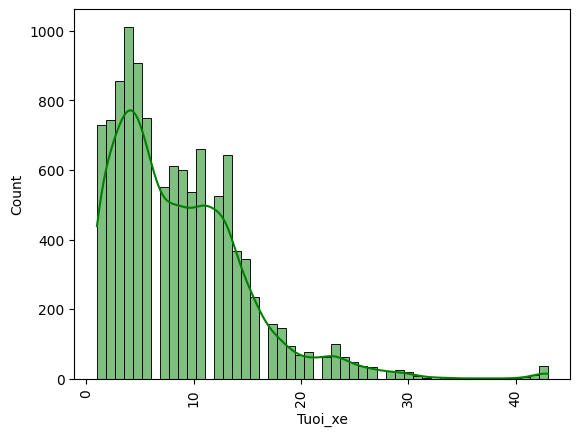

Tổ chức đồ tần số của cột "So_km_da_di":


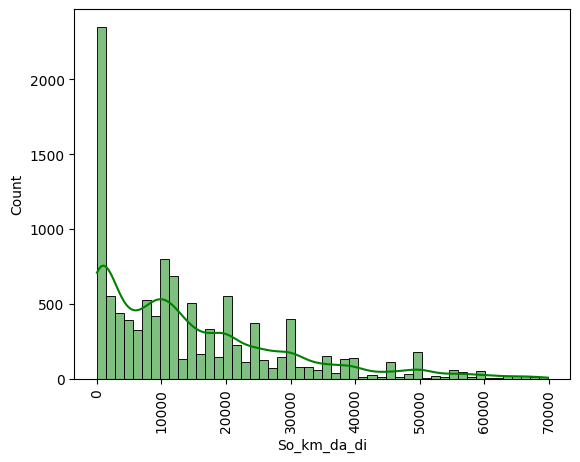

Tổ chức đồ tần số của cột "Gia_xe":


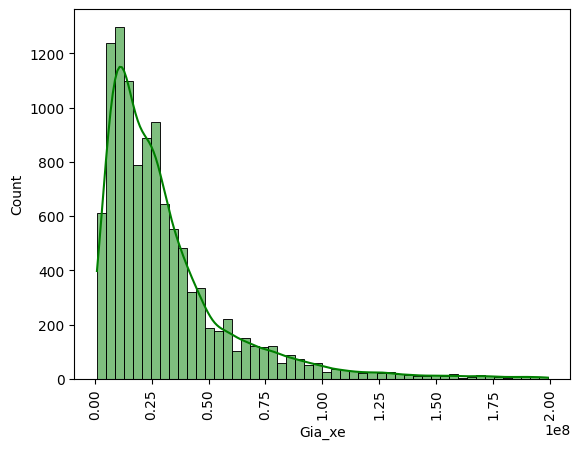

In [88]:
# Thể hiện tổ chức đồ tần số
for cot in cot_dinh_lg:
    print(f'Tổ chức đồ tần số của cột "{cot}":')
    sns.histplot(data=df, x=cot, kde=True, bins=50, color='g')
    plt.xticks(rotation=90)
    plt.show()

NOTE - 2:

<ul>
  <li>
    Cả ba trường dữ liệu đều phân bố chủ yếu ở những mức giá trị bên trái góc nhìn đối xứng của trục tung, như giá xe phân bố chủ yếu từ mức 75 triệu đồng trở xuống, số km đã đi phân bố nhiều ở mức dưới 30000km, còn tuổi xe đa phần ở mức từ 15, 16 tuổi trở xuống (Tức hầu hết các xe được sản xuất từ giai đoạn khoảng năm 2008 trở đi) 
  </li>
  <li>
    Điều đó đồng nghĩa với việc xu hướng bán các chiếc xe lâu đời, đi được nhiều km là không nhiều, điều này cũng là một điều có thể lưu ý khi chúng ta lựa chọn giao bán chiếc xe(Chú ý rằng xu hướng đăng bán không nhiều không đồng nghĩa với tỉ lệ mua ít).
  </li>
</ul>

Một điều rất được quan tâm tới các dữ liệu định lượng, là mối tương quan tuyến tính giữa các trường, đặc biệt là giữa trường output "Gia_xe" với hai trường còn lại

Ta sẽ thử đánh giá về mức độ tương quan tuyến tính

In [89]:
he_so_tg_quan = df[["Tuoi_xe", "So_km_da_di", "Gia_xe"]].corr()
he_so_tg_quan

,Tuoi_xe,So_km_da_di,Gia_xe
Tuoi_xe,1.000000,0.273296,-0.239883
So_km_da_di,0.273296,1.000000,-0.125474
Gia_xe,-0.239883,-0.125474,1.000000


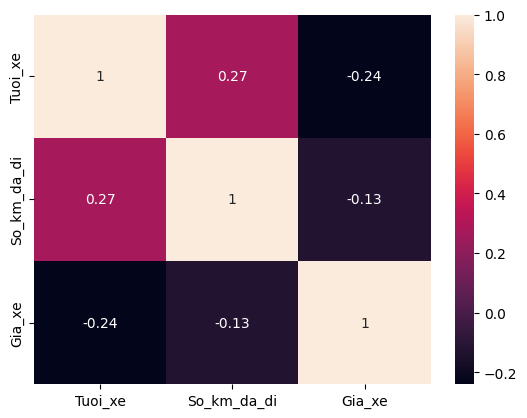

In [90]:
sns.heatmap(he_so_tg_quan, annot=True)
plt.show()

Biểu đồ tán xạ giữa "Gia_xe" và "Tuoi_xe":


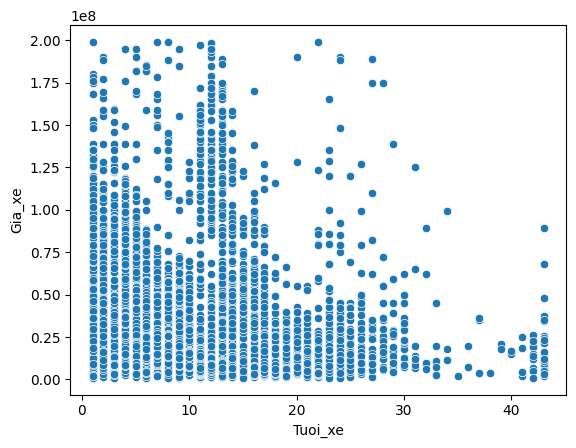

Biểu đồ tán xạ giữa "Gia_xe" và "So_km_da_di":


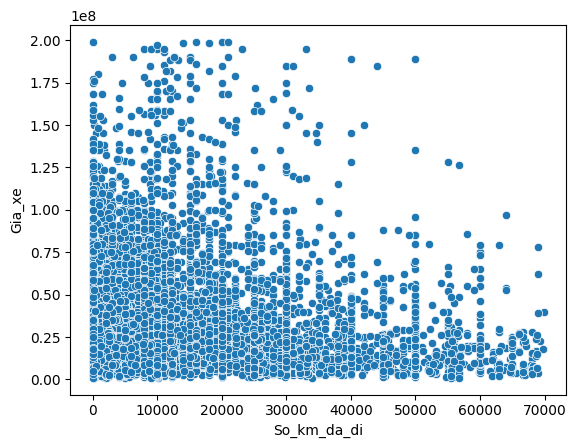

In [91]:
cot_dinh_lg = ["Tuoi_xe", "So_km_da_di"]

for cot in cot_dinh_lg:
  print(f"Biểu đồ tán xạ giữa \"Gia_xe\" và \"{cot}\":")
  sns.scatterplot(data=df, x=cot, y="Gia_xe")
  plt.show()

Hệ số tương quan giữa "Gia_xe" với hai trường thuộc tính trên có giá trị tuyệt đối không cao, thể hiện rằng rất rất ít mối quan hệ tuyến tính giữa các đại lượng này. 

NOTE - 3:
<ul>
  <li>
    Việc có rất ít sự tương quan tuyến tính giữa Gia_xe với lần lượt hai đại lượng trên có thể ảnh hưởng ít nhiều khi chúng ta sử dụng mô hình hồi quy tuyến tính để xây dựng mô hình.  
  </li>
</ul>


## 2. Phân tích dữ liệu định tính

Chúng ta sẽ phân tích - khám phá tiếp tới nhóm dữ liệu còn lại, là nhóm dữ liệu định tính, với các trường thuộc tính của chúng có chứa các giá trị phân loại hữu hạn, là các đối tượng khác nhau

In [92]:
df.columns

Index(['Hang_xe', 'Tuoi_xe', 'Nam_dang_ky', 'Tinh_trang_xe', 'Dung_tich_xe',
       'Dong_xe', 'So_km_da_di', 'Loai_xe', 'Gia_xe'],
      dtype='object')

Đối với các hãng xe, ta sẽ đếm số lượng xe của mỗi hãng

In [93]:
# Số lượng xe của các hãng:

df["Hang_xe"].value_counts()

Honda             6753
Yamaha            2296
Piaggio            805
Suzuki             438
SYM                306
Hãng khác          191
Kawasaki            61
GPX                 54
Benelli             32
Kymco               29
Ducati              26
Detech              16
Brixton             14
Daelim              13
RebelUSA            11
Visitor              9
MVAgusta             9
KTM                  9
Halim                8
Bazan                5
Taya                 5
Peugeot              5
BMW                  4
Nioshima             4
RoyalEnfield         3
Kengo                3
Sachs                3
Victory              2
Hyosung              1
RegalRaptor          1
Sanda                1
Vento                1
HarleyDavidson       1
Name: Hang_xe, dtype: int64

Các hãng xe có số lượng thấp thường sẽ rất khó đánh giá chính xác khi xây dựng mô hình, nên ta sẽ gom các hãng xe có số lượng ít, cụ thể ta có thể đặt ra ngưỡng số lượng dưới 50 thành giá trị "Hãng khác".

In [94]:
# Đổi các hãng xe có số lượng xe dưới 50 thành hãng khác

df['Hang_xe'] = df['Hang_xe'].apply(\
                lambda x : 'Hãng khác' if len(df[df['Hang_xe']==x]) < 50 else x)

df["Hang_xe"].value_counts()


Honda        6753
Yamaha       2296
Piaggio       805
Suzuki        438
Hãng khác     406
SYM           306
Kawasaki       61
GPX            54
Name: Hang_xe, dtype: int64

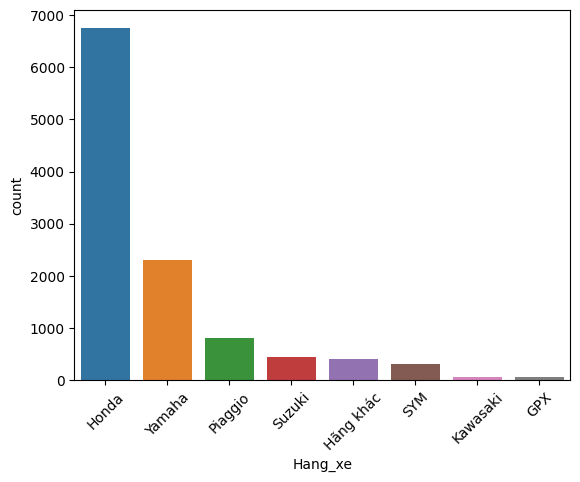

In [95]:
def plot_bar(column):
  sns.countplot(data=df, x=column, order=df[column].value_counts().index)
  plt.xticks(rotation=45)

  plt.show()

plot_bar('Hang_xe')

NOTE - 4:

<ul>
  <li>
    Biểu đồ cột cho ta thấy sự vượt trội về số lượng của các xe đước bán đến từ Honda, có lẽ đây cũng sẽ là hãng xe được giao bán nhiều nhất trên thị trường.
  </li>
</ul>

Cần lưu ý rằng, khi người đăng bán bán xe, nếu trường "Hãng xe" của họ có giá trị Hãng khác, còn Dòng xe của họ lại có giá trị cụ thể, thì rất có thể các dòng xe này đã được có giá trị hãng xe tương ứng ở các dòng dữ liệu này.

Do đó, tiếp theo đây, ta sẽ thử phân tích xem, liệu có dòng xe nào có dữ liệu hãng xe là "Hãng khác", trong khi đó, nó đã có giá trị cụ thể về hãng ở một dòng dữ liệu khác hay chưa 

In [96]:
hang_va_dong =  df[['Hang_xe', 'Dong_xe']]
hang_va_dong.drop_duplicates(inplace=True)
hang_va_dong.head(10)

/tmp/ipykernel_38846/4144696459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hang_va_dong.drop_duplicates(inplace=True)


,Hang_xe,Dong_xe
0,Suzuki,Sport/Xipo
1,Piaggio,Vespa
2,Yamaha,Exciter
4,Honda,Dream
6,Yamaha,Sirius
7,Honda,Winner
8,Honda,Vario
9,Yamaha,Nvx
10,Honda,AirBlade
13,Honda,SHMode


In [97]:
# Xem xem hãng khác có dòng nào của mục "Hãng khác" trùng với các hãng đã biết không
pd.set_option('display.max_rows', None)

hang_va_dong[hang_va_dong['Dong_xe'].duplicated(keep=False)]

,Hang_xe,Dong_xe
18,Honda,Cub
19,Piaggio,LX
42,Hãng khác,Dòng khác
114,Yamaha,Dòng khác
206,Honda,Dòng khác
296,Honda,CBR
347,Suzuki,Dòng khác
778,Hãng khác,CBR
878,SYM,Dòng khác
1296,Hãng khác,Cub


Phát hiện ra rằng dòng xe "Cub", "CBR" là của Honda nhưng bị gán hãng xe là "Hãng khác", do đó ta có thể trả về hãng xe đúng giá trị.

Còn với Vespa LX, giá trị hãng xe chính xác của nó là Piaggio (<a href="https://xe.chotot.com/kinh-nghiem/xe-vespa-cua-hang-nao.html">Thông tin</a>) nên ta cũng sẽ trả về đúng giá trị.

In [98]:
df["Hang_xe"] = np.where(df["Dong_xe"] == "Cub", 'Honda', df['Hang_xe'])
df["Hang_xe"] = np.where(df["Dong_xe"] == "CBR", 'Honda', df['Hang_xe'])
df["Hang_xe"] = np.where(df["Dong_xe"] == "LX", 'Piaggio', df['Hang_xe'])

df.head(10)

,Hang_xe,Tuoi_xe,Nam_dang_ky,Tinh_trang_xe,Dung_tich_xe,Dong_xe,So_km_da_di,Loai_xe,Gia_xe
0,Suzuki,27,1996,Đã sử dụng,Không rõ,Sport/Xipo,1234,Tay côn,25500000.0
1,Piaggio,9,2014,Đã sử dụng,100 - 175 cc,Vespa,11000,Tay ga,32500000.0
2,Yamaha,10,2013,Đã sử dụng,100 - 175 cc,Exciter,25,Tay côn,27500000.0
3,Yamaha,8,2015,Đã sử dụng,100 - 175 cc,Exciter,37,Xe số,26500000.0
4,Honda,24,1999,Đã sử dụng,100 - 175 cc,Dream,25,Xe số,25000000.0
6,Yamaha,10,2013,Đã sử dụng,Không rõ,Sirius,30,Xe số,7800000.0
7,Honda,4,2019,Đã sử dụng,Không rõ,Winner,1000,Tay côn,16500000.0
8,Honda,3,2020,Đã sử dụng,100 - 175 cc,Vario,1,Tay ga,40500000.0
9,Yamaha,5,2018,Đã sử dụng,Không rõ,Nvx,46000,Tay ga,26000000.0
10,Honda,14,2009,Đã sử dụng,100 - 175 cc,AirBlade,15000,Tay ga,12500000.0


Tiếp theo, ta xem xét giá trung bình của các dòng trong từng hãng qua các biểu đồ

Hãng xe: Hãng khác


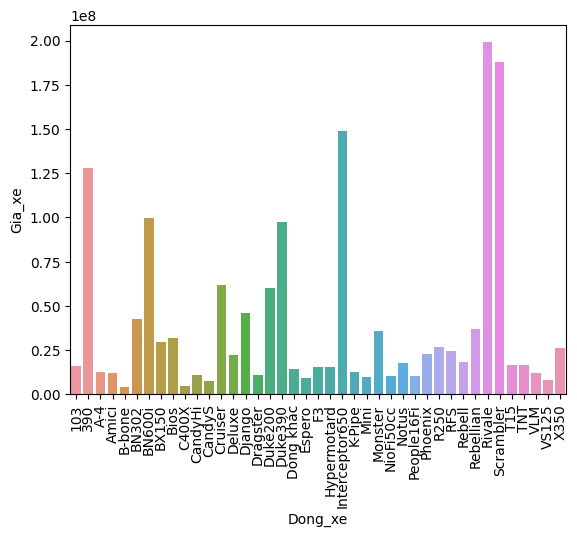

Hãng xe: GPX


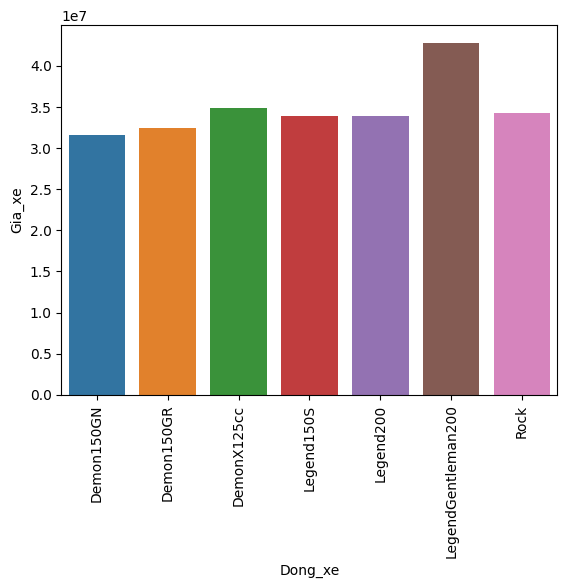

Hãng xe: Yamaha


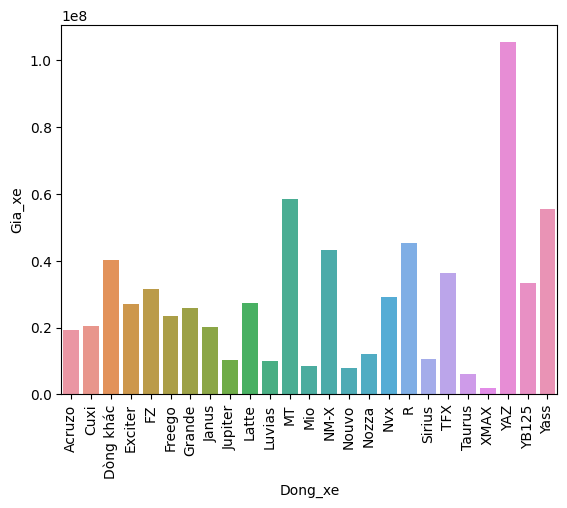

Hãng xe: SYM


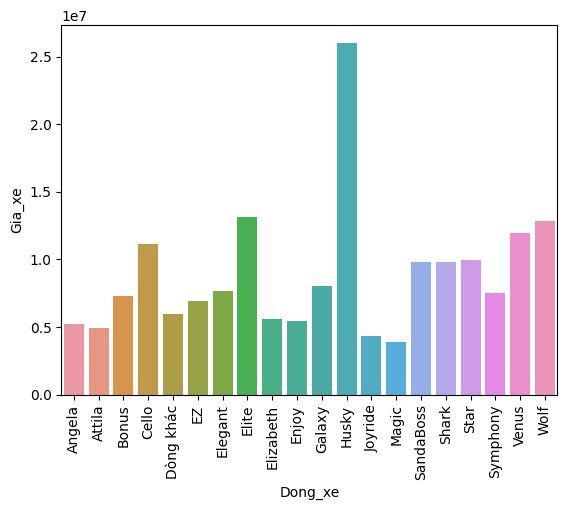

Hãng xe: Kawasaki


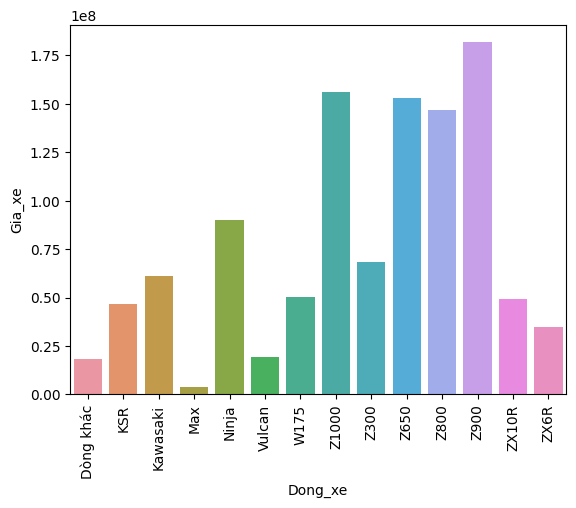

Hãng xe: Honda


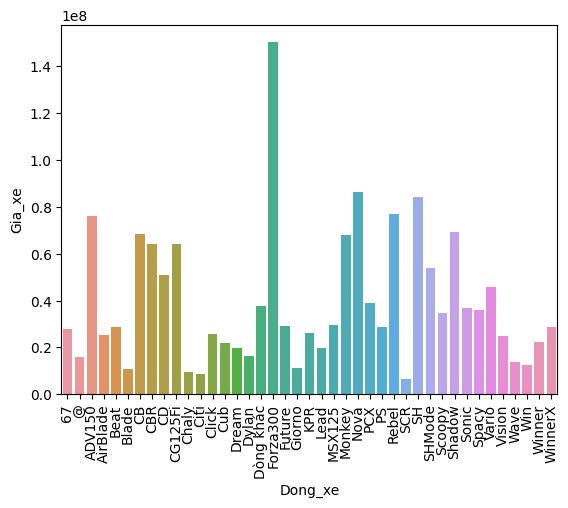

Hãng xe: Suzuki


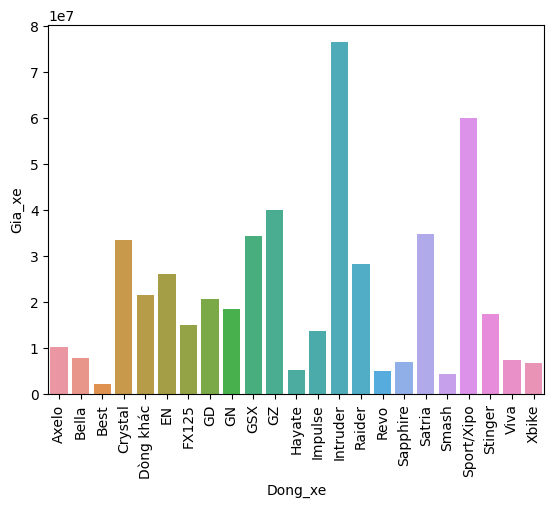

Hãng xe: Piaggio


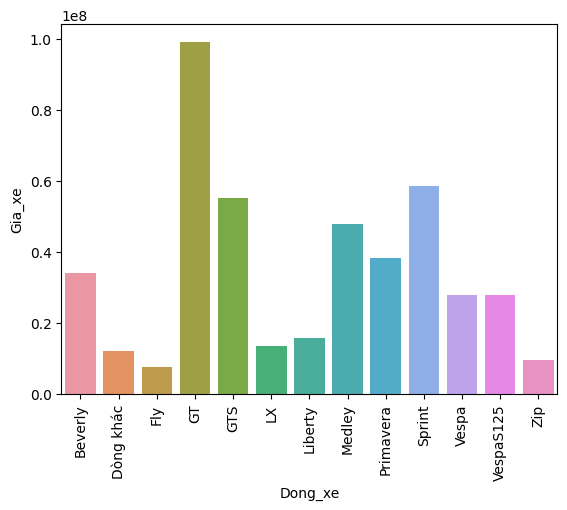

In [99]:
# Dòng xe của các hãng và giá trung bình

gia_TB = df.groupby(['Hang_xe', 'Dong_xe'], as_index=False)['Gia_xe'].mean()
cac_hang = list(set(df['Hang_xe']))



for hang in cac_hang:
    print(f"Hãng xe: {hang}")
    temp_df = gia_TB[['Dong_xe', 'Gia_xe']][gia_TB['Hang_xe'] == hang]
    sns.barplot(data=temp_df, x="Dong_xe", y="Gia_xe")
    plt.xticks(rotation=90)

    plt.show()
    

NOTE - 5:
<ul>
  <li>
  Hầu hết ở các hãng, các dòng đều có sự chênh lệch khá nhiều về giá trung bình, đồng thời, dòng xe luôn thuộc về một hãng xe, do đó khi xây dựng mô hình dự báo về giá xe, ta có thể loại đi thuộc tính về hãng xe. 

  </li>
</ul>

Ta xem xét đến các thuộc tính định tính còn lại:

Biểu đồ về số lượng của cột Loai_xe:


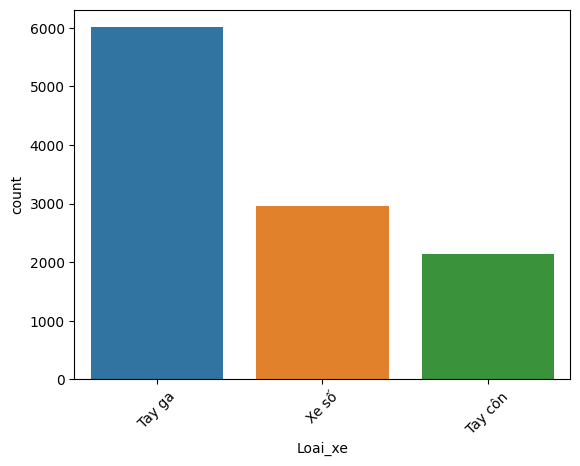

Cụ thể
Tay ga     6009
Xe số      2965
Tay côn    2145
Name: Loai_xe, dtype: int64
Biểu đồ về số lượng của cột Tinh_trang_xe:


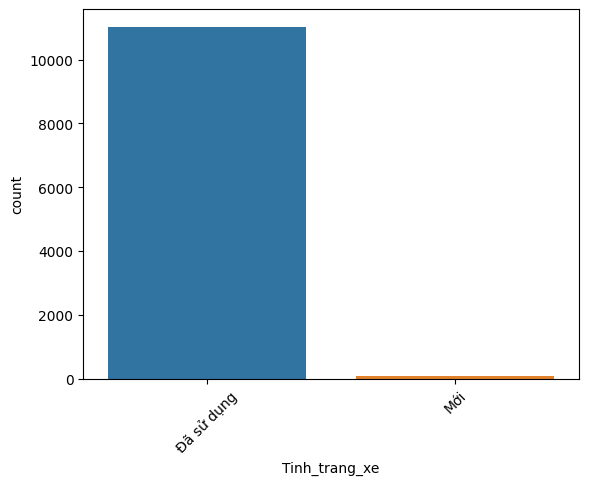

Cụ thể
Đã sử dụng    11027
Mới              92
Name: Tinh_trang_xe, dtype: int64
Biểu đồ về số lượng của cột Dung_tich_xe:


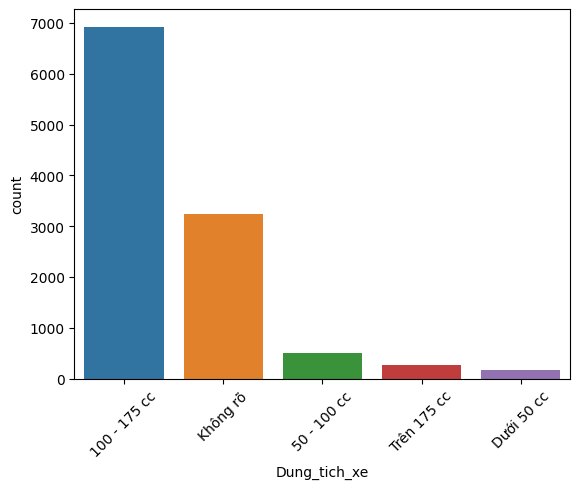

Cụ thể
100 - 175 cc    6923
Không rõ        3239
50 - 100 cc      504
Trên 175 cc      271
Dưới 50 cc       182
Name: Dung_tich_xe, dtype: int64


In [100]:
# Loại xe, tinh trang xe, dung tich xe

con_lai = ['Loai_xe', 'Tinh_trang_xe', 'Dung_tich_xe']

def show_value_counts(col):
    plot_bar(col)
    print('Cụ thể')
    print(df[col].value_counts())

for col in con_lai:
    print(f"Biểu đồ về số lượng của cột {col}:")
    show_value_counts(col)

NOTE - 6:

Về số lượng:
<ul>
  <li>
    Xe tay ga được bán nhiều hơn so với xe tay côn hay xe số
  </li>
  <li>
    Các xe hầu hết là đã sử dụng, tuy các xe mới là không nhiều, nhưng về số lượng, nó có thể đóng góp vào mô hình do cũng có tới 92 dữ liệu về các xe mới
  </li>
  <li>
    Các xe được bán chủ yếu là xe có phân khối từ 100-175cc
  </li>
</ul>

Giá xe trung bình theo thuộc tính: Dung_tich_xe


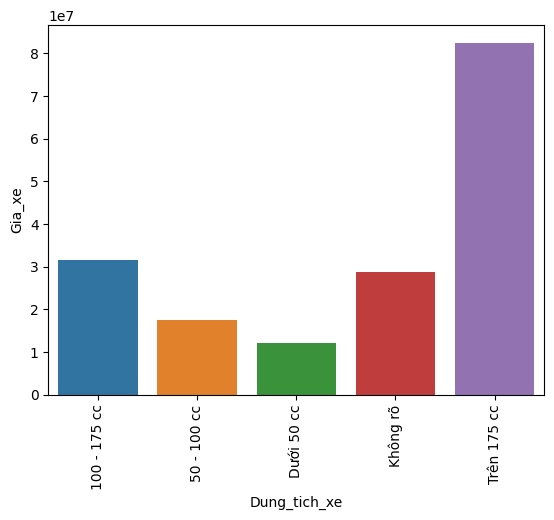

Giá xe trung bình theo thuộc tính: Loai_xe


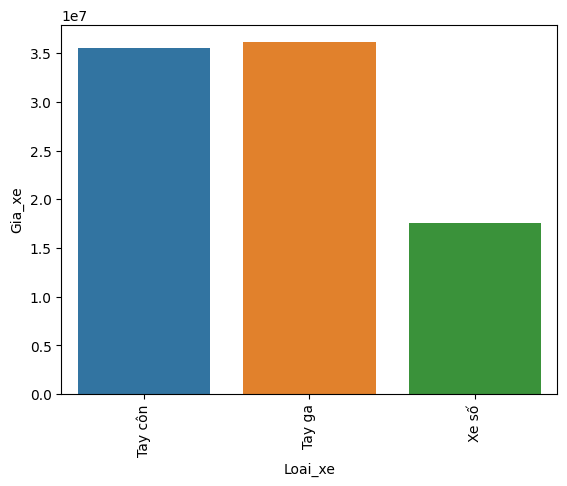

In [101]:
# Giá xe trung bình theo dung tích và loại xe:

def show_price(col):

  gia_TB = df.groupby([col], as_index=False)['Gia_xe'].mean()
  print(f"Giá xe trung bình theo thuộc tính: {col}")
  sns.barplot(data=gia_TB, x=col, y="Gia_xe")
  plt.xticks(rotation=90)

  plt.show()

show_price('Dung_tich_xe')
show_price('Loai_xe')



Giá xe trung bình theo thuộc tính: Tinh_trang_xe


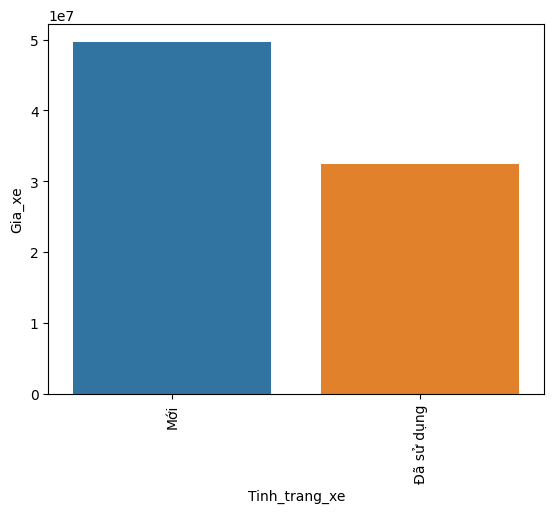

In [102]:
df_moi = df[['Tinh_trang_xe', 'Dong_xe', 'Gia_xe']][df['Tinh_trang_xe'] == 'Mới']
df_cu = df[['Tinh_trang_xe', 'Dong_xe', 'Gia_xe']].\
            loc[(df['Tinh_trang_xe'] == 'Đã sử dụng') & \
                df['Dong_xe'].isin(df_moi['Dong_xe'])]


frames = [df_moi, df_cu]

df_tinh_trg = pd.concat(frames)

gia_TB = df_tinh_trg.groupby('Tinh_trang_xe', as_index=False)['Gia_xe'].mean()
print(f"Giá xe trung bình theo thuộc tính: {'Tinh_trang_xe'}")
sns.barplot(data=gia_TB, x='Tinh_trang_xe', y="Gia_xe")
plt.xticks(rotation=90)

plt.show()



NOTE - 7:

Về giá trung bình:
<ul>
  <li>
    Xe tay ga và xe tay côn có giá trung bình cao hơn so với xe số
  </li>
  <li>
    Xe mới có giá cao hơn so với xe cũ cùng loại
  </li>
  <li>
    Xe phân khối càng cao thì giá càng cao (Tỷ lệ thuận)
  </li>
</ul>

Chúng ta đã trải qua quá trình phân tích - khám phá dữ liệu và rút ra được một vài các thông tin hữu ích được trích từ các NOTE, cuối cùng chúng ta sẽ lưu lại dữ liệu đã được xử lý thêm trước khi đến với bước xây dựng mô hình

In [103]:
df.shape

(11119, 9)

In [104]:
df.to_csv(SAVE_PATH, index=False)